In [36]:
#pandas is the python library that handles data loading and preprocessing
#Reads the CSV file into a DataFrame,Displays the dataset to check contents.
import pandas as pd
dataset=pd.read_csv("Salary_Data.csv")
dataset


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [37]:
#Define Independent and Dependent Variables,that store the features/independent/input and lables/target/reponsible variable/output/predict
independent=dataset[["YearsExperience"]]
independent

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [8]:
dependent=dataset[["Salary"]]
dependent

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [41]:
# Splits data into training and testing sets for model training and evaluation(ML-library]
!pip install scikit-learn
from sklearn.model_selection import train_test_split


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
# Combine train and test sets column-wise
# Rename columns for clarity
# Combine both train and test into one table
#80% training, 20% testing,ensure the same split for everytime
X_train, X_test, y_train, y_test=train_test_split(independent, dependent, test_size=0.2, random_state=42)
train_df = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
train_df.columns = ['Train_YearsExperience', 'Train_Salary']
test_df.columns = ['Test_YearsExperience', 'Test_Salary']

combined_df = pd.concat([train_df, test_df], axis=1)
combined_df

,Train_YearsExperience,Train_Salary,Test_YearsExperience,Test_Salary
0,10.3,122391.0,9.6,112635.0
1,8.7,109431.0,4.9,67938.0
2,4.0,56957.0,8.2,113812.0
3,1.1,39343.0,5.3,83088.0
4,2.2,39891.0,3.2,64445.0
5,5.1,66029.0,3.7,57189.0
6,2.9,56642.0,NaN,NaN
7,4.1,57081.0,NaN,NaN
8,4.0,55794.0,NaN,NaN
9,7.9,101302.0,NaN,NaN


In [42]:
#Import Linear Regression class to create model.
from sklearn.linear_model import LinearRegression

In [23]:
# LinearRegression(): Creates model,fit(): Trains model using training data.
regressor=LinearRegression()
regressor.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
#Get the model parameter
#coef_ (Weight): How much salary increases per year of experience.
weight=regressor.coef_
weight

array([[9423.81532303]])

In [26]:
#intercept_ (Bias): Base salary when experience is 0.
bias=regressor.intercept_
bias

array([25321.58301178])

In [27]:
#Predict on Test Data(Predicts salary for test data using trained model.)
y_pred=regressor.predict(X_test)

In [28]:
#Evaluate Model Performance(r2_score: Tells how accurate the model is, Range: 0 to 1. Higher = better)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.9024461774180497

In [45]:
!pip install matplotlib
import matplotlib.pyplot as plt


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/3b/d9/6dd924ad5616c97b7308e6320cf392c466237a82a2040381163b7500510a/matplotlib-3.10.5-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/19/e8/6026ed58a64563186a9ee3f29f41261fd1828f527dd93d33b60feca63352/contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/09/45/d2bdc9ea20bbadec1016fd0db45696d573d7a26d95ab5174ffcb6d74340b/fonttools-4.59.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/110.1 kB ? eta -:--:--
     ---------- ---------------------------- 30.7/110.1 kB 1.4 MB/s 


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


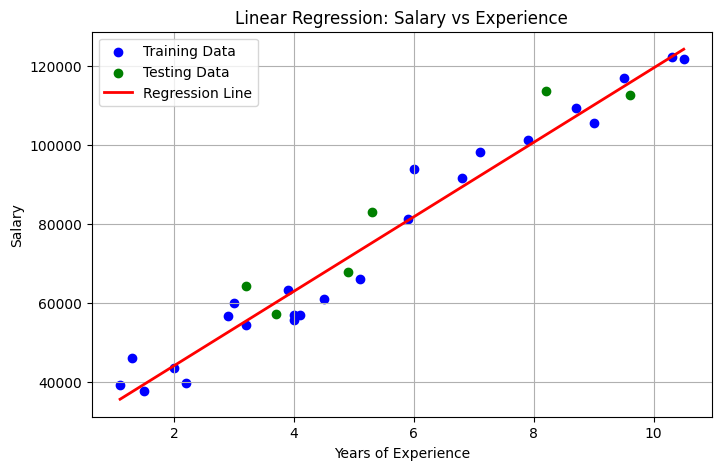

In [47]:
#Visualize with matplotlib (Inject this part)
# Plot training data
# Plot testing data
# Plot regression line over all data
plt.figure(figsize=(8,5))

plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')

plt.plot(independent, regressor.predict(independent), color='red', linewidth=2, label='Regression Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Experience")
plt.legend()
plt.grid(True)
plt.show()


In [46]:
#Save Model to disk
import pickle
filename="finalized_simple_linear_regression.sav"

In [30]:
##pickle.dump(): Saves trained model to .sav file for reuse.
pickle.dump(regressor,open(filename,'wb'))

In [43]:
# Load Model and Predict Again,Predicts salary for someone with 20 years of experience.
loaded_model=pickle.load(open("finalized_simple_linear_regression.sav",'rb'))
result=loaded_model.predict([[20]])
result

C:\Users\thirg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[213797.8894724]])